<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_8/AST_Clase_8_ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link de Facebook Prophet](https://facebook.github.io/prophet/docs/quick_start.html)

# Instalar e importar librerias

In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [ ]:
!pip install pystan
!pip install pystan==2.19.1.1
!pip install prophet
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 72 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639254 sha256=0323c245c71522bea8752ee4d05417db00257e264083f20eef495434ebddf643
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found e

In [ ]:
import pandas as pd
from fbprophet import Prophet

# Leer datos y procesar fechas

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/dataset.csv')

In [ ]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [ ]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [ ]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [ ]:
df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

In [ ]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# Entreno el modelo

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=False)
model = m.fit(df)

# Predicciones

In [ ]:
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3505.282082,779.984592,3955.704097,3505.282082,3505.282082,-1109.343064,-1109.343064,-1109.343064,16.642275,16.642275,16.642275,-1125.985339,-1125.985339,-1125.985339,0.0,0.0,0.0,2395.939018
1,2018-01-02,3506.073902,806.880132,3967.057168,3506.073902,3506.073902,-1119.420716,-1119.420716,-1119.420716,-11.258079,-11.258079,-11.258079,-1108.162637,-1108.162637,-1108.162637,0.0,0.0,0.0,2386.653185
2,2018-01-03,3506.865721,911.098723,4094.794327,3506.865721,3506.865721,-1093.540723,-1093.540723,-1093.540723,-4.382448,-4.382448,-4.382448,-1089.158276,-1089.158276,-1089.158276,0.0,0.0,0.0,2413.324997
3,2018-01-04,3507.657540,856.001275,3962.443952,3507.657540,3507.657540,-1046.574486,-1046.574486,-1046.574486,22.474721,22.474721,22.474721,-1069.049207,-1069.049207,-1069.049207,0.0,0.0,0.0,2461.083054
4,2018-01-05,3508.449359,822.172540,3932.522461,3508.449359,3508.449359,-1082.547436,-1082.547436,-1082.547436,-34.582418,-34.582418,-34.582418,-1047.965018,-1047.965018,-1047.965018,0.0,0.0,0.0,2425.901923


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1440,2021-12-12,4990.002757,2015.714483,5177.215933,4971.818869,5009.205377,-1417.469241,-1417.469241,-1417.469241,25.201244,25.201244,25.201244,-1442.670485,-1442.670485,-1442.670485,0.0,0.0,0.0,3572.533516
1441,2021-12-13,4991.074789,2104.946131,5193.963745,4972.790558,5010.339155,-1402.482550,-1402.482550,-1402.482550,16.642275,16.642275,16.642275,-1419.124825,-1419.124825,-1419.124825,0.0,0.0,0.0,3588.592239
1442,2021-12-14,4992.146821,2053.785609,5049.573048,4973.762247,5011.472248,-1407.626495,-1407.626495,-1407.626495,-11.258079,-11.258079,-11.258079,-1396.368416,-1396.368416,-1396.368416,0.0,0.0,0.0,3584.520325
1443,2021-12-15,4993.218852,2007.088890,5154.124849,4974.761184,5012.604687,-1379.030872,-1379.030872,-1379.030872,-4.382448,-4.382448,-4.382448,-1374.648424,-1374.648424,-1374.648424,0.0,0.0,0.0,3614.187981
1444,2021-12-16,4994.290884,2023.331836,5291.087401,4975.761999,5013.737127,-1331.670315,-1331.670315,-1331.670315,22.474721,22.474721,22.474721,-1354.145035,-1354.145035,-1354.145035,0.0,0.0,0.0,3662.620569


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2395.939018
1,2018-01-02,2386.653185
2,2018-01-03,2413.324997
3,2018-01-04,2461.083054
4,2018-01-05,2425.901923
...,...,...
1440,2021-12-12,3572.533516
1441,2021-12-13,3588.592239
1442,2021-12-14,3584.520325
1443,2021-12-15,3614.187981


In [ ]:
m.changepoints

35    2018-02-05
69    2018-03-11
104   2018-04-15
138   2018-05-19
173   2018-06-23
207   2018-07-27
242   2018-08-31
276   2018-10-04
311   2018-11-08
345   2018-12-12
380   2019-01-16
414   2019-02-19
449   2019-03-26
483   2019-04-29
518   2019-06-03
552   2019-07-07
587   2019-08-11
621   2019-09-14
656   2019-10-19
690   2019-11-22
725   2019-12-27
759   2020-01-30
794   2020-03-06
828   2020-04-09
863   2020-05-14
Name: ds, dtype: datetime64[ns]

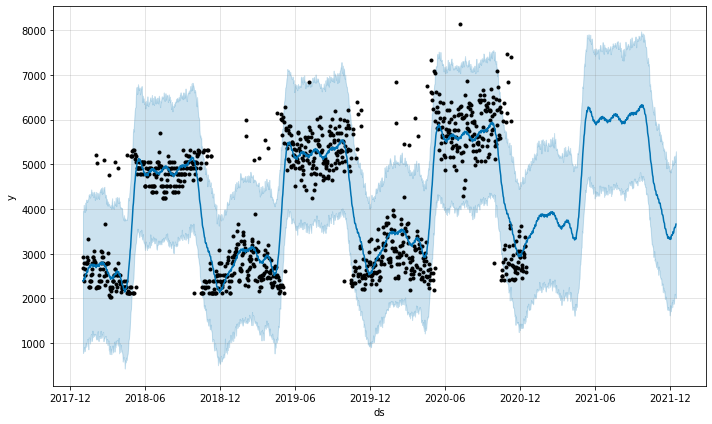

In [ ]:
plot1 = m.plot(forecast)

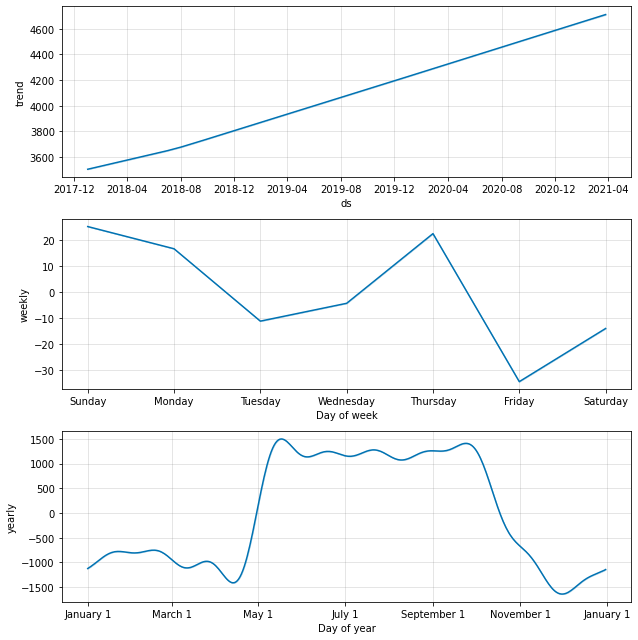

In [ ]:
plt2 = m.plot_components(forecast)